In [95]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
import numpy as np

In [2]:
books = pd.read_csv('https://raw.githubusercontent.com/sanjay-kv/amazon-ebook/main/Data/bestsellers_amazon.csv')
books

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [4]:
books['Genre'].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

In [5]:
books['Genre'] == 'Fiction'

0      False
1       True
2      False
3       True
4      False
       ...  
545     True
546    False
547    False
548    False
549    False
Name: Genre, Length: 550, dtype: bool

In [6]:
books[(books['Genre'] == 'Fiction') & (books['Year']>2014)].shape

(101, 7)

### 101 книга года в жанре fiction вышедшая после 2014

In [7]:
books[~((books['Genre'] == 'Fiction') | (books['Year']>2014))].shape

(161, 7)

### Отсортируем список по рейтингу  по убыванию и кол-ву отзывов по убыванию.

In [11]:
books.sort_values(by=['User Rating','Reviews'],ascending=[False,False])

,Name,Author,User Rating,Reviews,Price,Year,Genre
245,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2012,Fiction
246,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2013,Fiction
247,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2014,Fiction
248,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2015,Fiction
249,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2016,Fiction
...,...,...,...,...,...,...,...
22,Allegiant,Veronica Roth,3.9,6310,13,2013,Fiction
106,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,47265,14,2012,Fiction
107,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,47265,14,2013,Fiction
132,Go Set a Watchman: A Novel,Harper Lee,3.6,14982,19,2015,Fiction


### Создадим бинарную переменную

In [12]:
books['User Rating'].unique()

array([4.7, 4.6, 4.8, 4.4, 4.5, 3.9, 4.3, 4.2, 4.9, 3.8, 3.6, 4. , 4.1,
       3.3])

In [13]:
books['Normal Rating'] = books['User Rating'].apply(lambda x: 1 if x > 4.4 else 0)

### За нормальный рейтинг примем рейтинг выше 4.4

In [14]:
books.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre,Normal Rating
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,1
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,1
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,1
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,1
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,1


In [15]:
books['Normal Rating'].sum()

452

### 452 строки(книги) с нормальным рейтингом (выше 4.4)

### Создадим категориальную переменную для Price

In [16]:
books['Price'].unique() 

array([  8,  22,  15,   6,  12,  11,  30,   3,   2,  32,   5,  17,   4,
        13,  14,   9,  24,  21,  18,   0,  28,  16,  10, 105,  20,   1,
         7,  19,  54,  52,  25,  27,  46,  39,  53,  40,  36,  82,  23,
        42])

In [17]:
def get_price_cat(price):
    if price < 20 :
        return 'Cheap'
    elif price < 50 :
        return 'Medium'
    elif price >= 50:
        return 'Expensive'
    else :
        return price

In [18]:
books['Price Category'] = books['Price'].apply(get_price_cat)

In [19]:
books.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre,Normal Rating,Price Category
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,1,Cheap
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,1,Medium
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,1,Cheap
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,1,Cheap
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,1,Cheap


### Создали переменуую которая показывает ценовую категорию в зависимости от стоимости книги.

In [20]:
books['Price Category'] = pd.Categorical(books['Price Category'])

In [21]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Name            550 non-null    object  
 1   Author          550 non-null    object  
 2   User Rating     550 non-null    float64 
 3   Reviews         550 non-null    int64   
 4   Price           550 non-null    int64   
 5   Year            550 non-null    int64   
 6   Genre           550 non-null    object  
 7   Normal Rating   550 non-null    int64   
 8   Price Category  550 non-null    category
dtypes: category(1), float64(1), int64(4), object(3)
memory usage: 35.2+ KB


### Теперь создадим переменную выгодное предложение из нескольких условий. Для этого будем использовать Numpy

In [96]:
import numpy as np

In [97]:
books['Year'].unique() 

array([2016, 2011, 2018, 2017, 2019, 2014, 2010, 2009, 2015, 2013, 2012])

In [24]:
books['Profitable Offer'] = np.where((books['Price Category'] == 'Cheap') &
          (books['Normal Rating'] == 1) &
          (books['Year'] >= 2017), 1, 0)

In [25]:
books.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre,Normal Rating,Price Category,Profitable Offer
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,1,Cheap,0
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,1,Medium,0
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,1,Cheap,1
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,1,Cheap,1
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,1,Cheap,1


In [26]:
books['Profitable Offer']. sum()

119

### 119 книг попадающих под категорию выгодное предложение

### Создадим гистограмму для частотного распределения количественной переменной - цены

<AxesSubplot:>

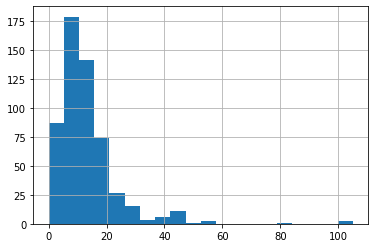

In [27]:
books['Price'].hist(bins = 20)

### Теперь создадим стобчатую диаграмму для ценовой категории

### Поосмотрим как распределяются ценовые категории внутри жанров, создав составной барчарт

In [28]:
books.groupby('Genre')['Price Category'].value_counts().unstack()

,Cheap,Medium,Expensive
Genre,,,
Fiction,216,22,2
Non Fiction,249,57,4


<AxesSubplot:xlabel='Genre'>

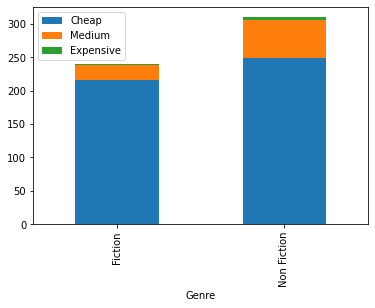

In [29]:
books.groupby('Genre')['Price Category'].value_counts().unstack().plot(kind = 'bar',stacked = True)

### Найдем меры центральной тенденции для столбца Price

In [30]:
books['Price'].mean()

13.1

### Ср. арифметическое столбца Price равно 13.1

In [31]:
books['Price'].median()

11.0

### Медиана равна 11

In [32]:
books['Price'].mode()

0    8
Name: Price, dtype: int64

### Моды - 0 и 11

In [33]:
books. groupby('Year')['Price'].mean()

Year
2009    15.40
2010    13.48
2011    15.10
2012    15.30
2013    14.60
2014    14.64
2015    10.42
2016    13.18
2017    11.38
2018    10.52
2019    10.08
Name: Price, dtype: float64

### Мы посчиталю среднюю стоимость книги для каждого года и можем увидеть, что самая. высокая стоимсоть была в 2009(15,4), а к 2019 опустилась до 10,08.

In [34]:
books. groupby('Year')['Price'].mean()

Year
2009    15.40
2010    13.48
2011    15.10
2012    15.30
2013    14.60
2014    14.64
2015    10.42
2016    13.18
2017    11.38
2018    10.52
2019    10.08
Name: Price, dtype: float64

### Теперь посмот рим среднее за год по каждому жанру

In [35]:
books.groupby(['Year','Genre'])['Price'].mean()

Year  Genre      
2009  Fiction        15.583333
      Non Fiction    15.230769
2010  Fiction         9.700000
      Non Fiction    16.000000
2011  Fiction        11.619048
      Non Fiction    17.620690
2012  Fiction        12.285714
      Non Fiction    17.482759
2013  Fiction        10.708333
      Non Fiction    18.192308
2014  Fiction        10.172414
      Non Fiction    20.809524
2015  Fiction         9.352941
      Non Fiction    10.969697
2016  Fiction        12.631579
      Non Fiction    13.516129
2017  Fiction         8.833333
      Non Fiction    13.730769
2018  Fiction         8.761905
      Non Fiction    11.793103
2019  Fiction         9.350000
      Non Fiction    10.566667
Name: Price, dtype: float64

### Мы видим, что у книг жанра Non Fiction в большинстве случаев (годов), средяя стоимость выше.

### Найдем также медиану

In [36]:
books.groupby(['Year','Genre'])['Price'].median()

Year  Genre      
2009  Fiction        11.5
      Non Fiction    13.5
2010  Fiction        10.0
      Non Fiction    14.0
2011  Fiction        10.0
      Non Fiction    15.0
2012  Fiction        11.0
      Non Fiction    16.0
2013  Fiction        12.0
      Non Fiction    13.0
2014  Fiction         8.0
      Non Fiction    15.0
2015  Fiction         9.0
      Non Fiction     9.0
2016  Fiction         9.0
      Non Fiction    10.0
2017  Fiction         7.5
      Non Fiction    11.0
2018  Fiction         8.0
      Non Fiction    11.0
2019  Fiction         8.0
      Non Fiction    11.0
Name: Price, dtype: float64

### Проверим какой жанр наиболее часто встречается в каждом году (найдем моду)

In [37]:
books.groupby('Year')['Genre'].agg(lambda x: x.value_counts().index[0])

Year
2009    Non Fiction
2010    Non Fiction
2011    Non Fiction
2012    Non Fiction
2013    Non Fiction
2014        Fiction
2015    Non Fiction
2016    Non Fiction
2017    Non Fiction
2018    Non Fiction
2019    Non Fiction
Name: Genre, dtype: object

### Соответственно, наиболее популярный (часто встречающийся жанр) - это Non Fiction (средняя стоимость на него также выше)

In [38]:
books.pivot_table(index='Year',
                 values=['User Rating','Price'],
                 aggfunc=['mean','median'])

mean             median            
      Price User Rating  Price User Rating
Year                                      
2009  15.40       4.584   12.0        4.60
2010  13.48       4.558   12.5        4.60
2011  15.10       4.558   13.0        4.60
2012  15.30       4.532   13.0        4.60
2013  14.60       4.554   12.5        4.60
2014  14.64       4.622   10.0        4.65
2015  10.42       4.648    9.0        4.70
2016  13.18       4.678    9.0        4.70
2017  11.38       4.660    9.0        4.70
2018  10.52       4.668    8.0        4.70
2019  10.08       4.740   10.0        4.80

### Создали сводную таблицу по годам, где отображаются ср. арифметическое и медиана для переменных Рейтинг и Стоимость.

### Сагрегируем мини датасет books_year где будет посчитана суммарное кол-во отзывов за каждый год

In [39]:
books_year = pd.DataFrame(books.groupby('Year')['Reviews'].sum())
books_year

,Reviews
Year,
2009,235506
2010,273981
2011,405041
2012,654546
2013,654907
2014,792997
2015,711669
2016,709800
2017,644420


<AxesSubplot:xlabel='Year'>

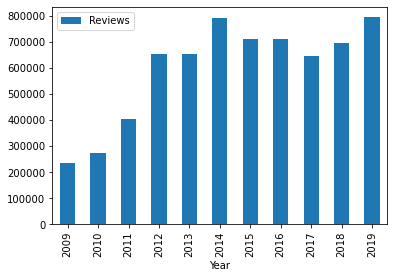

In [40]:
books_year.plot(kind = 'bar')

### В 2014 и в 2019 пользооователи наиболее охотно оставляли отзывы на книги.

### Найдем размах

In [41]:
books_year['Reviews'].max() - books_year['Reviews'].min()

559411

### Теперь найдем интерквартильный размах (для этого нам нужно из 75 вычесть 25 перцентиль)

In [42]:
np.percentile (books_year['Reviews'],75)  -  np.percentile (books_year['Reviews'],25)

186004.0

### Размах и интерквартильный размех равны 559411 и 186004.0 соответственно.

### Найдем дисперсию и среднеквадратичное отклонение для выборки

In [43]:
print(books_year['Reviews'].var())
print(books_year['Reviews'].std())

39413922395.8909
198529.39932385556


### Найдем дисперсию и среднеквадратичное отклонение для ген. совокупности

In [44]:
print(books_year['Reviews'].var(ddof=0))
print(books_year['Reviews'].std(ddof=0))

35830838541.719
189290.35512069546


### Среднее и среднеквадратичное отклонение кол-ва отзывов за каждый год

In [45]:
books.groupby('Year')['Reviews'].agg(['mean','std'])

,mean,std
Year,,
2009,4710.12,4044.634928
2010,5479.62,7443.268612
2011,8100.82,7384.113166
2012,13090.92,12444.619150
2013,13098.14,12915.815085
2014,15859.94,13736.714216
2015,14233.38,14269.180422
2016,14196.00,13017.119185
2017,12888.40,7763.144174


### Зададим формулу чтоб можно было считать интерквартильный размах 

In [46]:
def range_values(x):
    return x.max()-x.min()

In [47]:
books.pivot_table (index= 'Year',
                  values = ['Reviews', 'User Rating'],
                  aggfunc = ['var','std', range_values])

var                       std             range_values  \
           Reviews User Rating       Reviews User Rating      Reviews   
Year                                                                    
2009  1.635907e+07    0.040963   4044.634928    0.202394        19683   
2010  5.540225e+07    0.037180   7443.268612    0.192820        31714   
2011  5.452513e+07    0.041261   7384.113166    0.203129        31485   
2012  1.548685e+08    0.083037  12444.619150    0.288161        56070   
2013  1.668183e+08    0.083759  12915.815085    0.289412        57051   
2014  1.886973e+08    0.049506  13736.714216    0.222500        56293   
2015  2.036095e+08    0.054792  14269.180422    0.234077        77573   
2016  1.694454e+08    0.045016  13017.119185    0.212171        78639   
2017  6.026641e+07    0.035918   7763.144174    0.189521        27611   
2018  1.049072e+08    0.037731  10242.419393    0.194244        58626   
2019  2.061274e+08    0.023673  14357.138999    0.153862        85097   

                  
     User Rating  
Year              
2009         0.8  
2010         0.8  
2011         0.9  
2012         1.6  
2013         1.1  
2014         1.0  
2015         1.3  
2016         0.9  
2017         0.9  
2018         0.7  
2019         0.6

### Нашли меры разброса по каждому году для Отзывов и Рейтинга

In [48]:
import scipy.stats

In [49]:
books['z-score'] = scipy.stats.zscore(books['User Rating'])
books.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre,Normal Rating,Price Category,Profitable Offer,z-score
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,1,Cheap,0,0.359990
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,1,Medium,0,-0.080978
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,1,Cheap,1,0.359990
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,1,Cheap,1,0.359990
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,1,Cheap,1,0.800958


In [50]:
books[books['z-score'] < -3]

,Name,Author,User Rating,Reviews,Price,Year,Genre,Normal Rating,Price Category,Profitable Offer,z-score
22,Allegiant,Veronica Roth,3.9,6310,13,2013,Fiction,0,Cheap,0,-3.167752
106,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,47265,14,2012,Fiction,0,Cheap,0,-3.608720
107,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,47265,14,2013,Fiction,0,Cheap,0,-3.608720
132,Go Set a Watchman: A Novel,Harper Lee,3.6,14982,19,2015,Fiction,0,Cheap,0,-4.490656
353,The Casual Vacancy,J.K. Rowling,3.3,9372,12,2012,Fiction,0,Cheap,0,-5.813559
392,The Goldfinch: A Novel (Pulitzer Prize for Fic...,Donna Tartt,3.9,33844,20,2013,Fiction,0,Medium,0,-3.167752
393,The Goldfinch: A Novel (Pulitzer Prize for Fic...,Donna Tartt,3.9,33844,20,2014,Fiction,0,Medium,0,-3.167752


In [61]:
books[books['z-score'] > 3].shape

(0, 11)

###  У 5 книг в нашем списке z-оценка ниже -3 (их можно считать сильными выбросами). Оценка выше 3 отсутствует

In [51]:
books['User Rating'].describe()

count    550.000000
mean       4.618364
std        0.226980
min        3.300000
25%        4.500000
50%        4.700000
75%        4.800000
max        4.900000
Name: User Rating, dtype: float64

### Найдем выбросы через квартили

In [53]:
q3 = np.percentile(books['User Rating'],75)
q1 = np.percentile(books['User Rating'],25)
print (q3, q1)
iqr = q3 - q1
print(iqr)

4.8 4.5
0.2999999999999998


In [54]:
iqr_bottom = q1 - 1.5*iqr
iqr_top = q3 + 1.5*iqr
print(iqr_bottom,iqr_top)

4.050000000000001 5.25


In [64]:
books[books['User Rating'] > iqr_top].shape

(0, 11)

In [65]:
books[books['User Rating'] < iqr_bottom].shape

(21, 11)

In [69]:
books[books['User Rating'] < iqr_bottom]['Year'].value_counts()

2013    5
2012    4
2014    3
2015    2
2016    2
2009    2
2010    1
2011    1
2017    1
Name: Year, dtype: int64

### Наибольшее кол-во выбросов было в 2013 г.

### Посчитаем меры центральной тенденции для датасета без выбросов

In [70]:
iqr_no_outliers = books[books['User Rating'] >= iqr_bottom]

In [72]:
print(books['User Rating'].mean())
print(iqr_no_outliers['User Rating'].mean())

4.618363636363641
4.646313799621929


In [73]:
print(books['User Rating'].median())
print(iqr_no_outliers['User Rating'].median())

4.7
4.7


### Можем увидеть, что в нашем случае выбросы значительно не влияют на меры центральной тенденции.

### Надем корреляцию для рейтинга и цены

In [74]:
books['User Rating'].corr(books['Price'])

-0.13308628728087976

### Видим, что они связаны очень слабоой обратной завивимостью

### Протестируем гипотезу о независимости нормального рейтинга и жанра книги.

In [81]:
books_ct = books.groupby('Genre')['Normal Rating'].value_counts().unstack()
books_ct

Normal Rating,0,1
Genre,,
Fiction,40,200
Non Fiction,58,252


In [84]:
dof = (books_ct.shape[0] - 1) * (books_ct.shape[1] - 1)
dof

1

In [89]:
alpha = 0.01
critical_value = 6.63

In [83]:
scipy.stats.chi2_contingency(books_ct, correction=False)

(0.3855781536137148,
 0.5346329184383541,
 1,
 array([[ 42.76363636, 197.23636364],
        [ 55.23636364, 254.76363636]]))

In [88]:
chi_square = 0.3855781536137148

In [91]:
chi_square > critical_value

False

### Значение хи-квадрат не попадает в область критических значений, соответственно мы не можем отвергнуть гипотезу о независимости данных переменных и данная зависимость существует.

### Сагрегируем переменные по годам

In [100]:
reviews_sum = books.groupby('Year')['Reviews'].sum()
price_mean = books.groupby('Year')['Price'].mean()
rating_mean = books.groupby('Year')['User Rating'].mean()
normalrating_sum = books.groupby('Year')['Normal Rating'].sum()

books_year = pd.concat([reviews_sum, price_mean, rating_mean, normalrating_sum], axis=1)
books_year

,Reviews,Price,User Rating,Normal Rating
Year,,,,
2009,235506,15.40,4.584,40
2010,273981,13.48,4.558,37
2011,405041,15.10,4.558,35
2012,654546,15.30,4.532,37
2013,654907,14.60,4.554,37
2014,792997,14.64,4.622,44
2015,711669,10.42,4.648,45
2016,709800,13.18,4.678,45
2017,644420,11.38,4.660,44


In [113]:
X = books_year['User Rating']
y = books_year['Price']

res = scipy.stats.linregress(X, y)
print(res)

LinregressResult(slope=-26.32281411402873, intercept=134.66832751098977, rvalue=-0.8201506900682602, pvalue=0.0019895429154058145, stderr=6.12104352648774, intercept_stderr=28.271825972317362)


### Коэффициент детерминации: наша модель на 67% объясняет дисперсию в целевой переменной

In [114]:
r_sq = res.rvalue ** 2
print(r_sq)

0.6726471544194434


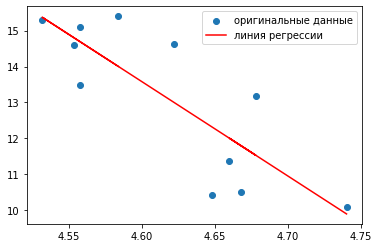

In [115]:
plt.scatter(X, y, label='оригинальные данные')
plt.plot(X, res.intercept + res.slope*X, 'r', label='линия регрессии')
plt.legend()
plt.show()

In [134]:
a = sm.add_constant(books['Normal Rating'])
b = books['Profitable Offer']
logit = sm.Logit(b, a_constant).fit()
print(logit.summary())

         Current function value: 0.473740
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:       Profitable Offer   No. Observations:                  550
Model:                          Logit   Df Residuals:                      548
Method:                           MLE   Df Model:                            1
Date:                Wed, 14 Dec 2022   Pseudo R-squ.:                 0.09292
Time:                        23:43:43   Log-Likelihood:                -260.56
converged:                      False   LL-Null:                       -287.25
Covariance Type:            nonrobust   LLR p-value:                 2.750e-13
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -25.8644   4.18e+04     -0.001      1.000   -8.19e+04    8.18e+04
Normal Rating    24.8353   4.18e+04      0.001      1.00

/Users/Evelina/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [129]:
np.exp(-25.8644)

5.85104990410827e-12

### Если это невыгодное предложение, то шанс попадание книги в категорию с нормальным рейтингом 5/1

### Если это выгодное предложение, то шанс повышается

In [130]:
np.exp(24.8353)

61070819309.534424